In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from dash import Dash, dcc, html
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from scipy import linalg
from matplotlib.patches import Ellipse
from math import radians

from sklearn.metrics.pairwise import haversine_distances

from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

from nearpy.distances import EuclideanDistance
from nearpy.hashes import RandomDiscretizedProjections, RandomBinaryProjections
from nearpy.filters import NearestFilter, UniqueFilter, DistanceThresholdFilter
from nearpy.engine import Engine

from sklearn.neighbors import NearestNeighbors

import pickle
import logging
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook"

In [29]:
import warnings

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
logging.getLogger("matplotlib").setLevel(logging.ERROR)
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "cmr10"

In [10]:
with open("/Users/polaris000/Documents/UrbanHealthOpt/results_simulation_1.pkl", "rb") as f:
    results = pickle.load(f)

In [13]:
results

{(0.1,
  0.8,
  0.1,
  -0.1): {'hospitals':     Facility ID                                  Facility Name  \
  0         13733          Professional Registered Nursing, P.C.   
  1         12541                   Avalon Nurses Registry, Inc.   
  2         12514  Lower West Side Household Service Corporation   
  3          4296        Fordham-Tremont Comm Mntl Health Center   
  4          2975   Center for Comprehensive Health Practice Inc   
  ..          ...                                            ...   
  122        5705                                         P S 95   
  123        5556                      Mount Sinai Kidney Center   
  124         NaN                                   Hospital 125   
  125         NaN                                   Hospital 126   
  126         NaN                                   Hospital 127   
  
      Short Description                             Description  \
  0               LHCSA      Licensed Home Care Services Agency   
  1  

In [18]:
results = pd.DataFrame.from_dict(results, orient="index")

In [23]:
results

hospitals  \
0.1 0.80 0.10 -0.1      Facility ID                               ...   
              -0.5      Facility ID                               ...   
              -1.0      Facility ID                               ...   
         0.33 -0.1      Facility ID                               ...   
              -0.5      Facility ID                               ...   
...                                                               ...   
0.5 0.25 0.33 -0.5      Facility ID                               ...   
              -1.0      Facility ID                               ...   
         0.25 -0.1      Facility ID                               ...   
              -0.5      Facility ID                               ...   
              -1.0      Facility ID                               ...   

                                                               losses  \
0.1 0.80 0.10 -0.1  [0.01651409947610915, 0.02466871114214864, 0.0...   
              -0.5  [0.01651409947610915, 0.02466871114214864, 0.0...   
              -1.0  [0.01651409947610915, 0.02466871114214864, 0.0...   
         0.33 -0.1  [0.00835196135517668, 0.02466871114214864, 0.0...   
              -0.5  [0.00835196135517668, 0.02466871114214864, 0.0...   
...                                                               ...   
0.5 0.25 0.33 -0.5  [0.005670165156289127, 0.007549452413101322, 0...   
              -1.0  [0.005670165156289127, 0.007549452413101322, 0...   
         0.25 -0.1  [0.005670165156289127, 0.007549452413101322, 0...   
              -0.5  [0.005670165156289127, 0.007549452413101322, 0...   
              -1.0  [0.005670165156289127, 0.007549452413101322, 0...   

                                                               scores  
0.1 0.80 0.10 -0.1  [0.8841249153801232, 0.8758574601606632, 0.822...  
              -0.5  [0.8841249153801232, 0.8758574601606632, 0.822...  
              -1.0  [0.8841249153801232, 0.8758574601606632, 0.822...  
         0.33 -0.1  [1.0450353435451272, 1.0363072897704473, 0.972...  
              -0.5  [1.0450353435451272, 1.0363072897704473, 0.972...  
...                                                               ...  
0.5 0.25 0.33 -0.5  [0.8647274765588052, 0.7894690997370891, 0.650...  
              -1.0  [0.8647274765588052, 0.7894690997370891, 0.650...  
         0.25 -0.1  [0.7847274765588053, 0.7218448663536183, 0.684...  
              -0.5  [0.7847274765588053, 0.7218448663536183, 0.597...  
              -1.0  [0.7847274765588053, 0.7218448663536183, 0.597...  

[81 rows x 3 columns]

In [34]:
results["losses"].iloc[0]

[0.01651409947610915, 0.02466871114214864, 0.029813441025658548]

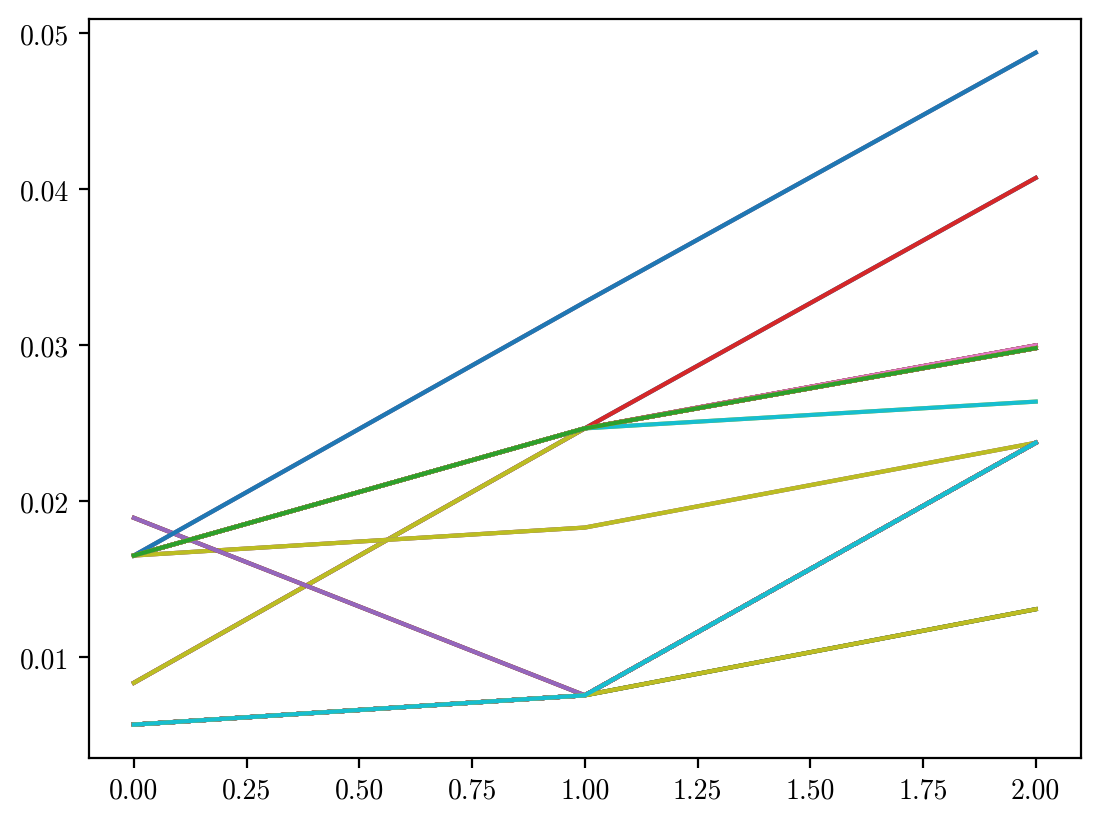

In [32]:
for i in range(80):
    plt.plot(results["losses"].iloc[i])

In [49]:
for i in range(8, 10):
  dimension = 2

  # Create a random binary hash with 10 bits
  rbp = RandomBinaryProjections('rbp', i)

  # Create engine with pipeline configuration
  engine = Engine(dimension, lshashes=[rbp],distance = EuclideanDistance() )
  vectors_to_store = [[-1,1],[1,0],[5,4],[5,2]]
  for j,vector in enumerate(vectors_to_store):
    engine.store_vector(vector, j)  # You can provide unique identifiers in place of 'vector'
  dt_filter = DistanceThresholdFilter(3)
  engine.distance_filter = dt_filter

  N = engine.neighbours([0,0])
  print(i,N)

8 []
9 []


In [53]:



nn = NearestNeighbors(
    n_neighbors=len(vectors_to_store), radius=3, algorithm="ball_tree"
).fit(vectors_to_store)
len(nn.radius_neighbors([[0, 0]], return_distance=False)[0])

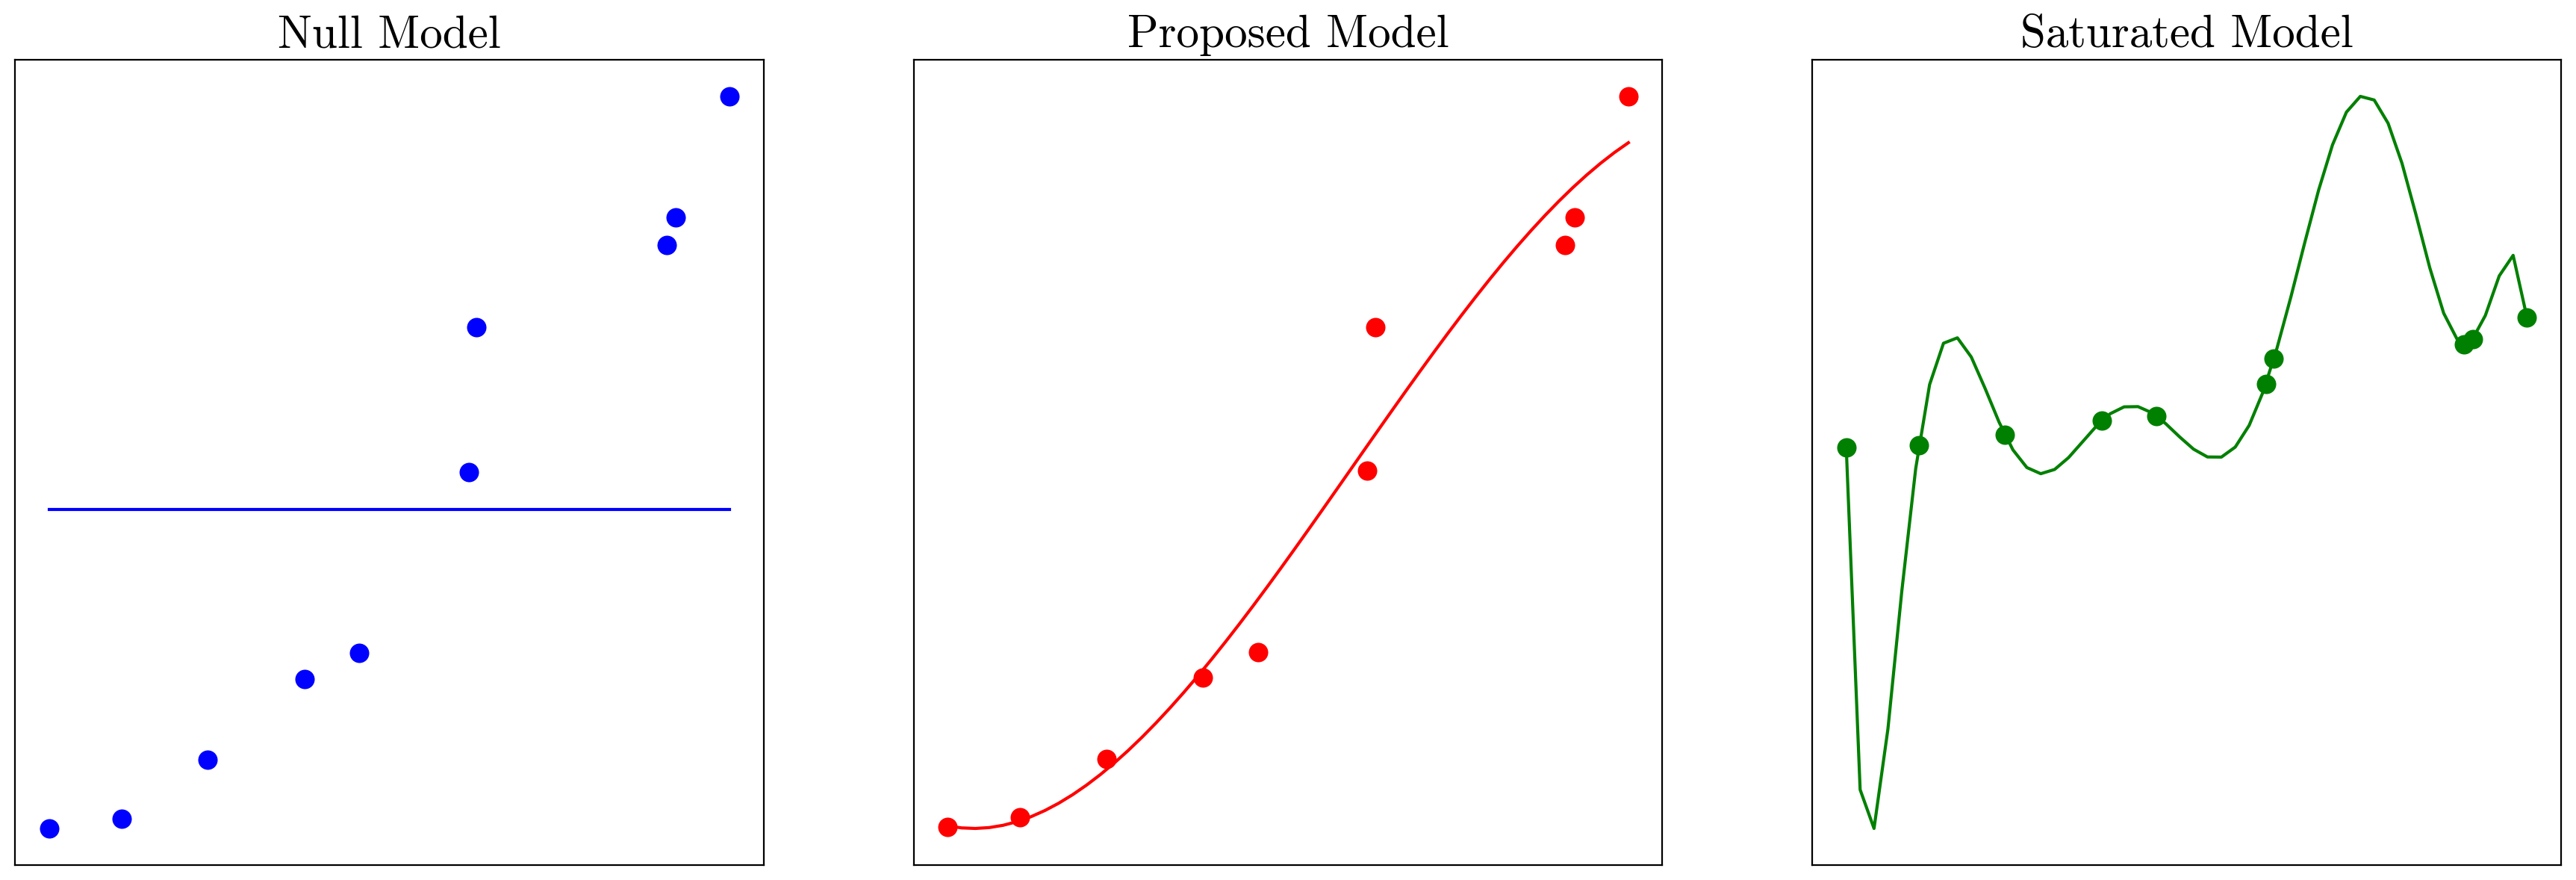

In [67]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# generate data and sort it
x = np.random.randn(10)
y = np.random.randn(10)
x.sort()
y.sort()

# calculate the null, proposed and saturated models
null_coeff = np.polyfit(x, y, 0)
null_model = np.poly1d(null_coeff)
null_x = np.linspace(x[0], x[-1])
null_y = null_model(null_x)

saturated_coeff = np.polyfit(x, y, len(x))
saturated_model = np.poly1d(saturated_coeff)
saturated_x = np.linspace(x[0], x[-1])
saturated_y = saturated_model(saturated_x)

proposed_coeff = np.polyfit(x, y, 3)
proposed_model = np.poly1d(proposed_coeff)
proposed_x = np.linspace(x[0], x[-1])
proposed_y = proposed_model(proposed_x)

# plot the models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,7))
ax1.plot(null_x, null_y, color="blue")
ax1.scatter(x,y,s=70, color="blue")
ax1.set_title('Null Model', fontsize=22)
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)

ax2.plot(proposed_x, proposed_y, color="red")
ax2.scatter(x,y,s=70, color="red")
ax2.set_title('Proposed Model', fontsize=22)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)

ax3.plot(saturated_x, saturated_y, color="green")
ax3.scatter(x,y,s=70, color="green")
ax3.set_title('Saturated Model', fontsize=22)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)